In [ ]:
pip install scikit-fuzzy


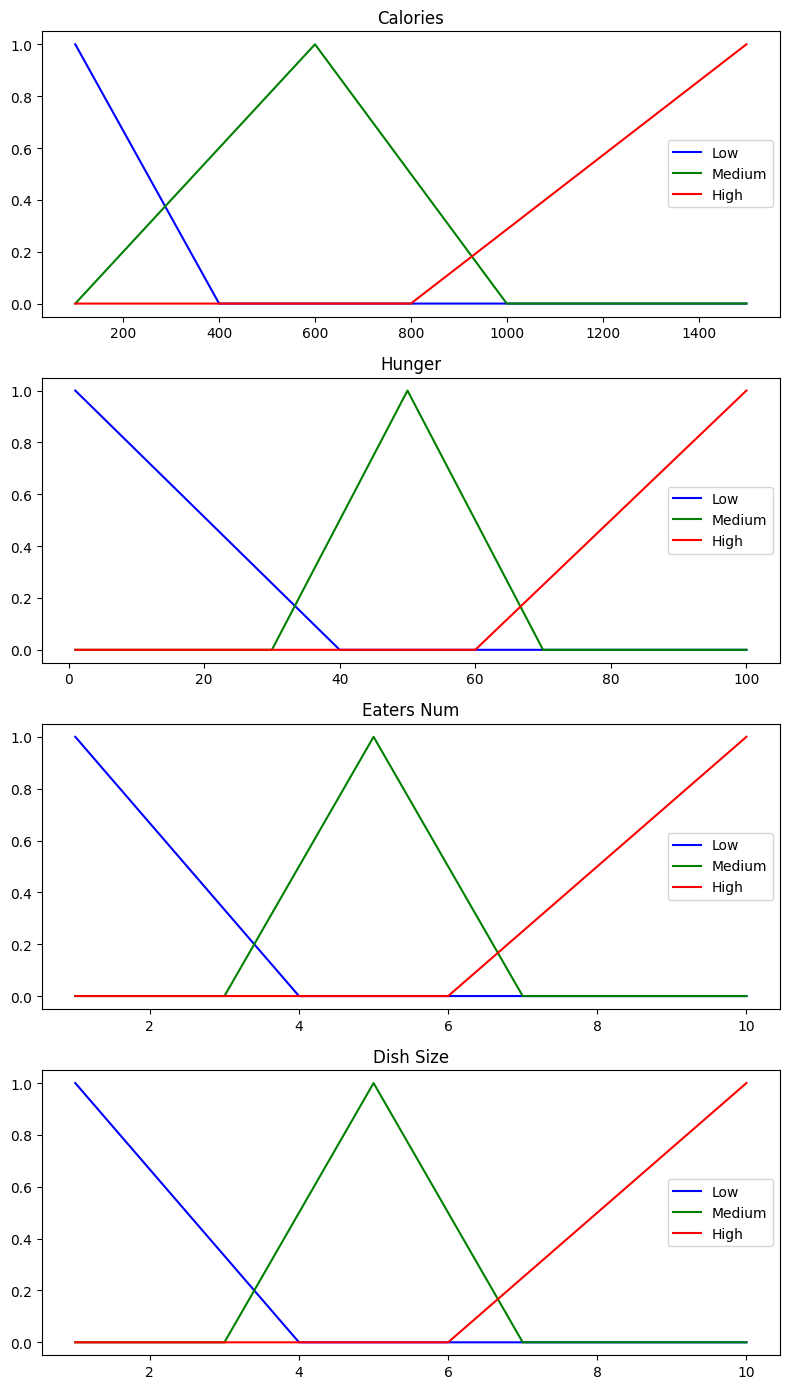

Run 1:
  Calories: 940
  Hunger: 35
  Eaters Num: 9


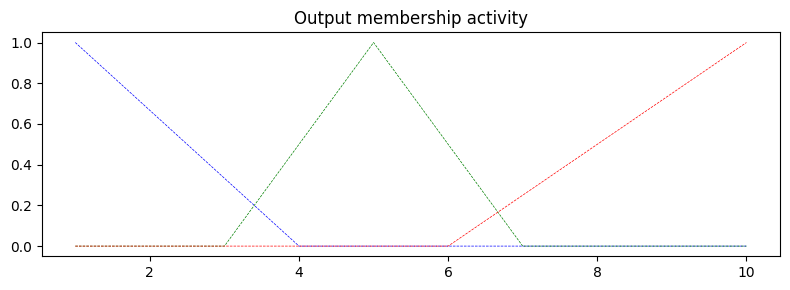

  Невозможно определить размер блюда для текущего набора значений.

Run 2:
  Calories: 1272
  Hunger: 8
  Eaters Num: 8


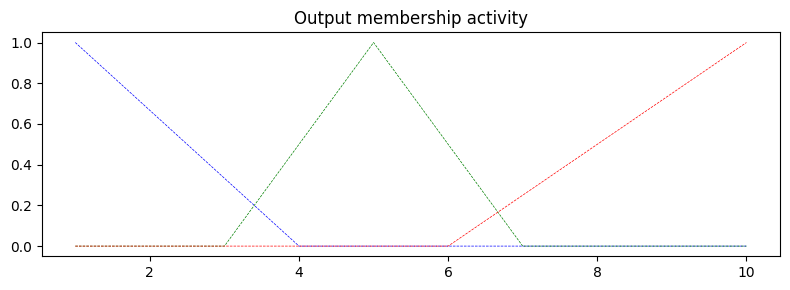

  Невозможно определить размер блюда для текущего набора значений.

Run 3:
  Calories: 828
  Hunger: 21
  Eaters Num: 2


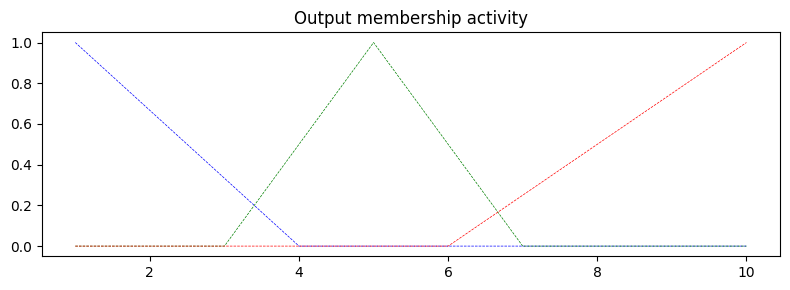

  Невозможно определить размер блюда для текущего набора значений.

Run 4:
  Calories: 851
  Hunger: 96
  Eaters Num: 3


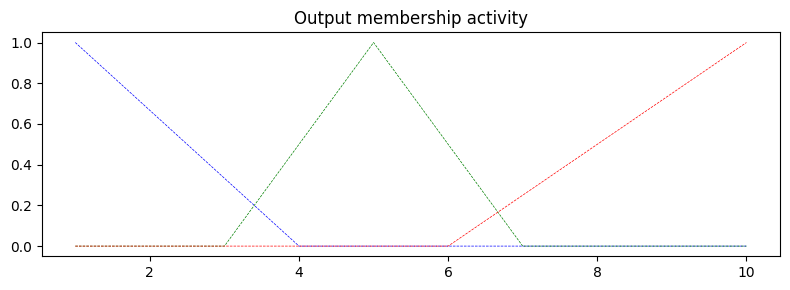

  Невозможно определить размер блюда для текущего набора значений.

Run 5:
  Calories: 1472
  Hunger: 82
  Eaters Num: 9


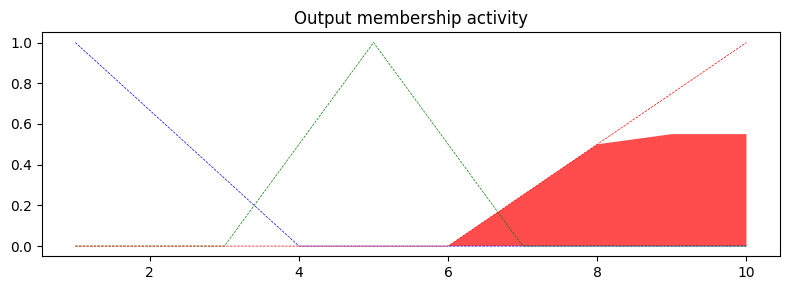

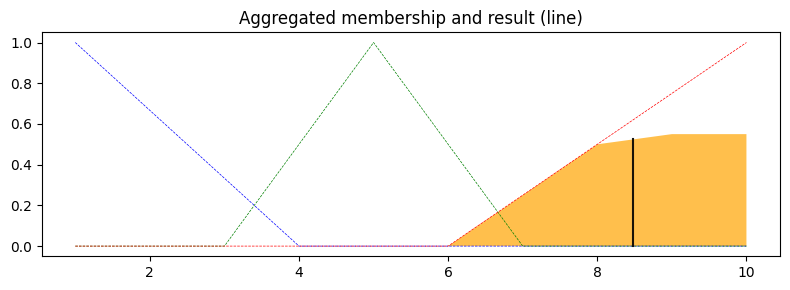

  Размер блюда: 8.481481481481483



In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import random

# Универсальные множества
x_calories = np.arange(100, 1501, 20)
x_hunger = np.arange(1, 101, 1)
x_eaters = np.arange(1, 11, 1)
x_dish_size = np.arange(1, 11, 1)

# Функции принадлежности для калорий
calories_low = fuzz.trimf(x_calories, [100, 100, 400])
calories_medium = fuzz.trimf(x_calories, [100, 600, 1000])
calories_high = fuzz.trimf(x_calories, [800, 1500, 1500])

# Функции принадлежности для голода
hunger_low = fuzz.trimf(x_hunger, [1, 1, 40])
hunger_medium = fuzz.trimf(x_hunger, [30, 50, 70])
hunger_high = fuzz.trimf(x_hunger, [60, 100, 100])

# Функции принадлежности для количества едоков
eaters_low = fuzz.trimf(x_eaters, [1, 1, 4])
eaters_medium = fuzz.trimf(x_eaters, [3, 5, 7])
eaters_high = fuzz.trimf(x_eaters, [6, 10, 10])

# Функции принадлежности для размера блюда
dish_size_low = fuzz.trimf(x_dish_size, [1, 1, 4])
dish_size_medium = fuzz.trimf(x_dish_size, [3, 5, 7])
dish_size_high = fuzz.trimf(x_dish_size, [6, 10, 10])

# Визуализация функций принадлежности
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8, 14))

ax0.plot(x_calories, calories_low, 'b', linewidth=1.5, label='Low')
ax0.plot(x_calories, calories_medium, 'g', linewidth=1.5, label='Medium')
ax0.plot(x_calories, calories_high, 'r', linewidth=1.5, label='High')
ax0.set_title('Calories')
ax0.legend()

ax1.plot(x_hunger, hunger_low, 'b', linewidth=1.5, label='Low')
ax1.plot(x_hunger, hunger_medium, 'g', linewidth=1.5, label='Medium')
ax1.plot(x_hunger, hunger_high, 'r', linewidth=1.5, label='High')
ax1.set_title('Hunger')
ax1.legend()

ax2.plot(x_eaters, eaters_low, 'b', linewidth=1.5, label='Low')
ax2.plot(x_eaters, eaters_medium, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_eaters, eaters_high, 'r', linewidth=1.5, label='High')
ax2.set_title('Eaters Num')
ax2.legend()

ax3.plot(x_dish_size, dish_size_low, 'b', linewidth=1.5, label='Low')
ax3.plot(x_dish_size, dish_size_medium, 'g', linewidth=1.5, label='Medium')
ax3.plot(x_dish_size, dish_size_high, 'r', linewidth=1.5, label='High')
ax3.set_title('Dish Size')
ax3.legend()

plt.tight_layout()
plt.show()

# Количество прогонов
num_runs = 5

# Выполнение нескольких прогонов
for i in range(num_runs):
    # Генерация случайных входных значений
    random_calories_value = random.randint(100, 1500)
    random_hunger_value = random.randint(1, 100)
    random_eaters_value = random.randint(1, 10)

    # Определение степени принадлежности для случайных значений
    input_calories_low = fuzz.interp_membership(x_calories, calories_low, random_calories_value)
    input_calories_medium = fuzz.interp_membership(x_calories, calories_medium, random_calories_value)
    input_calories_high = fuzz.interp_membership(x_calories, calories_high, random_calories_value)

    input_hunger_low = fuzz.interp_membership(x_hunger, hunger_low, random_hunger_value)
    input_hunger_medium = fuzz.interp_membership(x_hunger, hunger_medium, random_hunger_value)
    input_hunger_high = fuzz.interp_membership(x_hunger, hunger_high, random_hunger_value)

    input_eaters_low = fuzz.interp_membership(x_eaters, eaters_low, random_eaters_value)
    input_eaters_medium = fuzz.interp_membership(x_eaters, eaters_medium, random_eaters_value)
    input_eaters_high = fuzz.interp_membership(x_eaters, eaters_high, random_eaters_value)

    print(f'Run {i + 1}:')
    print(f'  Calories: {random_calories_value}')
    print(f'  Hunger: {random_hunger_value}')
    print(f'  Eaters Num: {random_eaters_value}')

    # Правила
    # rule1: Если калории низкие И голод низкий И едоков мало, ТО размер блюда низкий
    rule1 = np.fmin(np.fmin(input_calories_low, input_hunger_low), input_eaters_low)

    # rule2: Если калории средние И голод средний И едоков среднее количество, ТО размер блюда средний
    rule2 = np.fmin(np.fmin(input_calories_medium, input_hunger_medium), input_eaters_medium)

    # rule3: Если калории высокие И голод высокий И едоков много, ТО размер блюда высокий
    rule3 = np.fmin(np.fmin(input_calories_high, input_hunger_high), input_eaters_high)

    # Активация функций принадлежности для размера блюда
    dish_size_activation_low = np.fmin(rule1, dish_size_low)
    dish_size_activation_medium = np.fmin(rule2, dish_size_medium)
    dish_size_activation_high = np.fmin(rule3, dish_size_high)

    dish_size0 = np.zeros_like(x_dish_size)

    # Визуализация активации
    fig, ax0 = plt.subplots(figsize=(8, 3))

    ax0.fill_between(x_dish_size, dish_size0, dish_size_activation_low, facecolor='b', alpha=0.7)
    ax0.fill_between(x_dish_size, dish_size0, dish_size_activation_medium, facecolor='g', alpha=0.7)
    ax0.fill_between(x_dish_size, dish_size0, dish_size_activation_high, facecolor='r', alpha=0.7)

    ax0.plot(x_dish_size, dish_size_low, 'b', linewidth=0.5, linestyle='--')
    ax0.plot(x_dish_size, dish_size_medium, 'g', linewidth=0.5, linestyle='--')
    ax0.plot(x_dish_size, dish_size_high, 'r', linewidth=0.5, linestyle='--')

    ax0.set_title('Output membership activity')
    plt.tight_layout()
    plt.show()

    # Агрегирование результатов
    aggregated = np.fmax(dish_size_activation_low, np.fmax(dish_size_activation_medium, dish_size_activation_high))

    # Проверка, что совокупная функция принадлежности не равна нулю
    if np.sum(aggregated) == 0:
        print(f'  Невозможно определить размер блюда для текущего набора значений.\n')
        continue

    # Дефаззификация
    dish = fuzz.defuzz(x_dish_size, aggregated, 'centroid')
    dish_activation = fuzz.interp_membership(x_dish_size, aggregated, dish)

    # Визуализация результата
    fig, ax0 = plt.subplots(figsize=(8, 3))

    ax0.plot(x_dish_size, dish_size_low, 'b', linewidth=0.5, linestyle='--')
    ax0.plot(x_dish_size, dish_size_medium, 'g', linewidth=0.5, linestyle='--')
    ax0.plot(x_dish_size, dish_size_high, 'r', linewidth=0.5, linestyle='--')
    ax0.fill_between(x_dish_size, dish_size0, aggregated, facecolor='Orange', alpha=0.7)

    ax0.plot([dish, dish], [0, dish_activation], 'k', linewidth=1.5, alpha=0.9)
    ax0.set_title('Aggregated membership and result (line)')
    plt.tight_layout()
    plt.show()

    print(f'  Размер блюда: {dish}\n')
